# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

import pandas_profiling

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
%run import.ipynb

## Target variable

In [3]:
y.describe()

count    1.710756e+06
mean     2.217509e-04
std      2.240643e-02
min     -8.609413e-02
25%     -9.561389e-03
50%     -1.570681e-04
75%      9.520990e-03
max      9.349781e-02
Name: y, dtype: float64

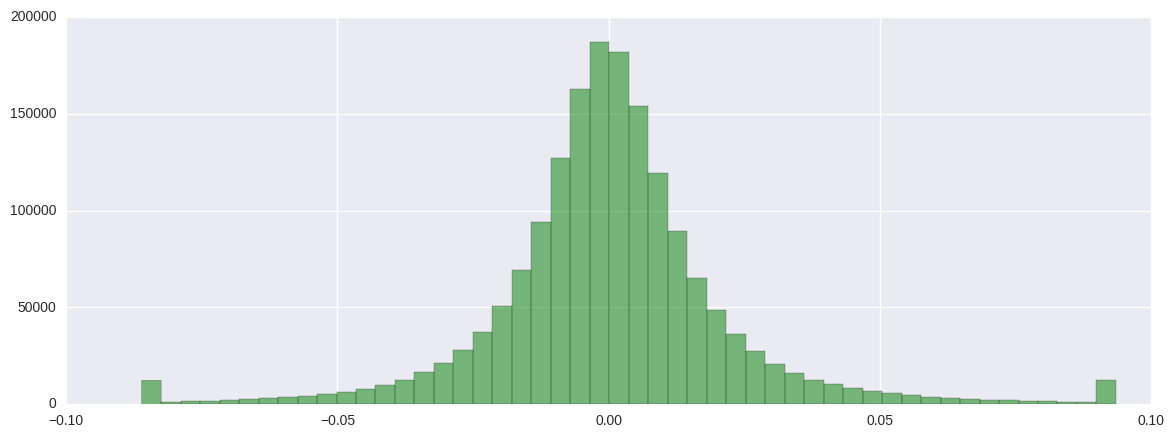

In [4]:
plt.figure(figsize = (14, 5));
plt.hist(y, bins = 50, color = 'green', alpha = 0.5);

# balls = pd.DataFrame([[-0.01, 0.0, 0.015], [25000, 175000, 75000]]).transpose()
# plt.scatter(balls[0], balls[1], color = 'red', s = 80);

## Features

In [5]:
X.columns

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       ...
       'technical_35', 'technical_36', 'technical_37', 'technical_38',
       'technical_39', 'technical_40', 'technical_41', 'technical_42',
       'technical_43', 'technical_44'],
      dtype='object', length=110)

In [6]:
cols = X.columns
n_rows = X.shape[0]
nulls_sum = []

for c in cols:
    current_nulls_sum = sum(X[c].isnull())
    nulls_sum.append(current_nulls_sum)

In [9]:
nulls = pd.DataFrame({'column' : cols, 'n' : nulls_sum})
nulls['percent'] = round(nulls.n * 100 / n_rows, 2)

In [13]:
nulls.sort_values(by = 'percent',
                  ascending = False).head(20)

,column,n,percent
11,fundamental_5,962020,56.23
44,fundamental_38,803489,46.97
12,fundamental_6,701625,41.01
8,fundamental_1,679070,39.69
67,fundamental_61,671801,39.27
34,fundamental_28,667331,39.01
32,fundamental_26,657184,38.41
63,fundamental_57,657184,38.41
30,fundamental_24,576655,33.71
15,fundamental_9,565567,33.06


In [15]:
# X.describe()

In [14]:
# %time rep = pandas_profiling.ProfileReport(X)
# rep.to_file('pandas_profiling_report.html')

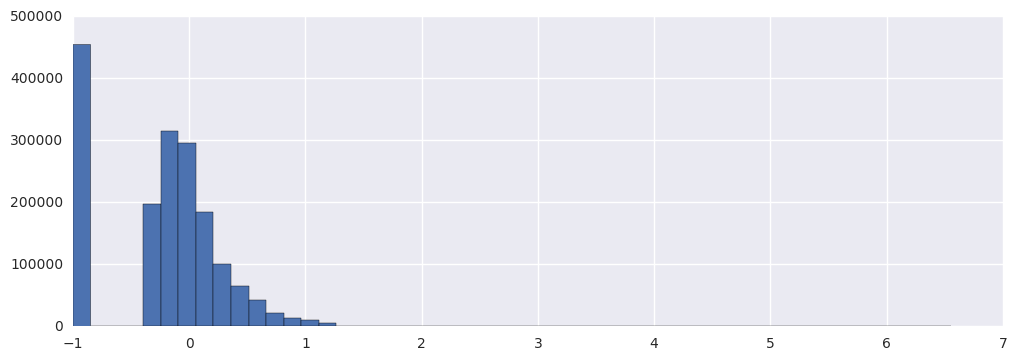

In [37]:
plt.figure(figsize = (12, 4));
plt.hist(X.fundamental_3.fillna(-1), bins = 50);

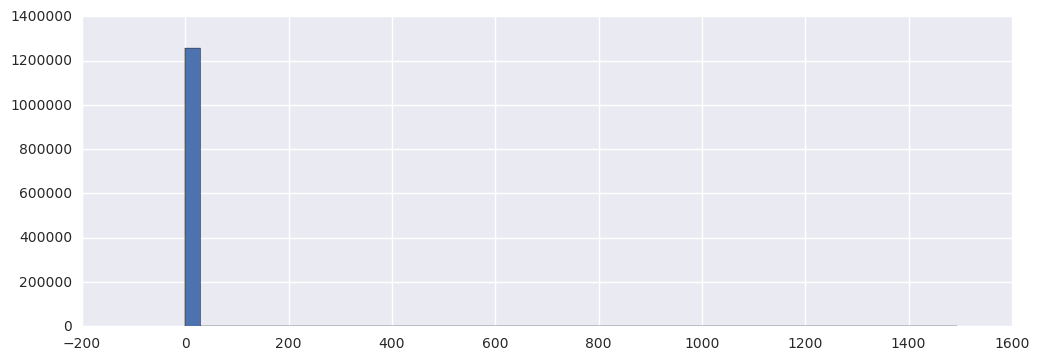

In [38]:
plt.figure(figsize = (12, 4));
plt.hist(X.fundamental_31[X.fundamental_31.isnull() == False], bins = 50);

## Correlations

In [10]:
correlations_with_target = X.corrwith(y)
correlations_with_target.sort_values(ascending = False).head(20)

technical_30      0.014272
fundamental_11    0.008151
fundamental_51    0.006013
fundamental_53    0.006009
fundamental_18    0.005123
technical_0       0.004328
fundamental_55    0.003846
technical_37      0.003783
fundamental_60    0.003421
fundamental_56    0.002926
fundamental_2     0.002646
fundamental_15    0.001970
technical_12      0.001834
fundamental_17    0.001646
fundamental_63    0.001558
technical_3       0.001544
fundamental_28    0.001452
technical_16      0.001413
technical_13      0.001377
derived_2         0.001369
dtype: float64

-----
Let's check:

* `fundamental_26`, `fundamental_57`
* `fundamental_31`, `fundamental_3`

In [17]:
X[['fundamental_26', 'fundamental_57']].corr()

,fundamental_26,fundamental_57
fundamental_26,1.000000,-0.000978
fundamental_57,-0.000978,1.000000


In [18]:
X[['fundamental_31', 'fundamental_3']].corr()

,fundamental_31,fundamental_3
fundamental_31,1.000000,0.017613
fundamental_3,0.017613,1.000000
